### Studia podyplomowe: Inżynieria Danych – Data Science
PROJEKT (własny) z Politechniki Gdańskiej
#### <i>autor: Artur Karpiński</i>

### Analiza danych filmowych na platformie Netflix
Mój projekt oparty jest na wybranych danych  dotyczących Systemu Rekomendacji Filmów. Nie wykorzystuję indywidualnych danych związanych z użytkownikami. W odróżnieniu od autora danych nie chodzi mi więc o rekomendowanie, reklamowanie tytułów widzom na podstawie zebranych o nich danych, prefencji.
Wybrane dane:
- tytuły filmów
- czas wydania, najważniejsze gatunki filmów
- oceny i daty jej wystawienia

Na podstawie zebranych danych szukałem, analizowałem i pokazywałem zależności  między tytułami, gatunkami filmów, ich ocenami i popularnością wśród widzów na przestrzeni czasu. Korzystałem z otwartych danych z platformy Kaggle.

### Czyszczenie danych
Wykorzystywać będziemy dane dwóch plików:
1. movies – informacje dotyczące filmów
2. ratings – informacje dotyczące ocen tych filmów

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# informacje o filmach

df_movies = pd.read_csv('./data/movies.csv')

In [3]:
# tabela zawiera więcej informacji niż ma kolumn
# w kolumnach więcej niż jedna informacja (np. rok, tytuł)

df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# aby wyodrębnić tytuł i rok produkcji, string jako wzorzec wyrażenia regularnego poprzedzony r
# środku cztery liczby, expand=True, aby wzorzec z list string podzielić na kolumny
# po podziale tytułu na kolumny, usunięcie zbędnej, zmiana nazw kolumn

df_movies['title'].str.split(r'(\(\d\d\d\d\))', expand=True) \
    .drop(columns=2) \
    .rename(columns={0: 'title', 1: 'year'}) \
    .head()

,title,year
0,Toy Story,(1995)
1,Jumanji,(1995)
2,Grumpier Old Men,(1995)
3,Waiting to Exhale,(1995)
4,Father of the Bride Part II,(1995)


In [5]:
# _zmienna pomocnicza _df i usunięcie nawiasów przy year

_df = df_movies['title'].str.split(r'(\(\d\d\d\d\))', expand=True) \
    .drop(columns=2) \
    .rename(columns={0: 'title', 1: 'year'})
df_movies['title'] = _df['title']
df_movies['year'] = _df['year'].str.strip('()')
del _df
df_movies.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [6]:
# lista i liczba brakujących elementów w year (68)

df_movies[df_movies['year'].isna()]

,movieId,title,genres,year
10603,40697,Babylon 5,Sci-Fi,None
15674,79607,"Millions Game, The (Das Millionenspiel)",Action|Drama|Sci-Fi|Thriller,None
17376,87442,"Bicycle, Spoon, Apple (Bicicleta, cullera, poma)",Documentary,None
22471,107434,Diplomatic Immunity (2009– ),Comedy,None
22782,108548,"Big Bang Theory, The (2007-)",Comedy,None
...,...,...,...,...
34013,150655,Aimy in a Cage,Drama|Fantasy|Sci-Fi,None
34014,150657,Trophy Kids,Documentary,None
34058,150868,Jasne Błękitne Okna,(no genres listed),None
34068,150888,Mr. Kuka's Advice,(no genres listed),None


In [7]:
# null nie jest konwertowalny do liczby
# brakujące wartości zastępujemy -1, bo taki rok na pewno nie istnieje

df_movies['year'] = df_movies['year'].fillna(-1).astype(np.int16)
df_movies['year'].dtype

dtype('int16')

In [8]:
# lista i liczba brakujących elementów w year (teraz puste wyeliminowane)

df_movies[df_movies['year'].isna()]

,movieId,title,genres,year


In [9]:
df_movies.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [10]:
# genres (rodzaje filmów) w jednej kolumnie trudne wykorzystania (analizy, filtrowania itp.)
# 'no genres listed' (brak rodzaju filmu) zamieniamy na pusty string bez kreski
# każdy wpis do małej litery
# dzielimy wpisy względem pionowej kreski

df_movies['genres'] = df_movies['genres'].replace({'(no genres listed)': ''}) \
    .str.lower() \
    .str.split('|')
df_movies

,movieId,title,genres,year
0,1,Toy Story,"[adventure, animation, children, comedy, fantasy]",1995
1,2,Jumanji,"[adventure, children, fantasy]",1995
2,3,Grumpier Old Men,"[comedy, romance]",1995
3,4,Waiting to Exhale,"[comedy, drama, romance]",1995
4,5,Father of the Bride Part II,[comedy],1995
...,...,...,...,...
34203,151697,Grand Slam,[thriller],1967
34204,151701,Bloodmoney,[],2010
34205,151703,The Butterfly Circus,[drama],2009
34206,151709,Zero,"[drama, sci-fi]",2015


In [11]:
# teraz wyczyszczenie tabeli rating (oceny)
# wybieramy jedynie potrzebne kolumny

df_ratings = pd.read_csv('./data/ratings.csv', usecols=['movieId', 'rating', 'timestamp'])

df_ratings.head()

,movieId,rating,timestamp
0,169,2.5,1204927694
1,2471,3.0,1204927438
2,48516,5.0,1204927435
3,2571,3.5,1436165433
4,109487,4.0,1436165496


In [12]:
# konwertujemy te liczby do obiektów typu datetime
# wykorzystujemy funkcję pd.to_datetime (sekundy jako jednostki)

df_ratings['timestamp'] = pd.to_datetime(df_ratings['timestamp'], unit='s')
df_ratings.head()

,movieId,rating,timestamp
0,169,2.5,2008-03-07 22:08:14
1,2471,3.0,2008-03-07 22:03:58
2,48516,5.0,2008-03-07 22:03:55
3,2571,3.5,2015-07-06 06:50:33
4,109487,4.0,2015-07-06 06:51:36


In [13]:
# sprawdzamy czy timestamp zawiera jakieś informacje czasowe
# to liczba sekund od jakiegoś umownego roku

df_ratings['timestamp']

0         2008-03-07 22:08:14
1         2008-03-07 22:03:58
2         2008-03-07 22:03:55
3         2015-07-06 06:50:33
4         2015-07-06 06:51:36
                  ...        
1009994   1997-05-10 19:17:26
1009995   1997-01-19 11:54:11
1009996   1997-01-18 19:24:30
1009997   1997-01-19 17:40:53
1009998   1997-01-19 17:40:53
Name: timestamp, Length: 1009999, dtype: datetime64[ns]

In [14]:
# ocena najniższa

df_ratings['rating'].min()

0.5

In [15]:
# ocena najniższa

df_ratings['rating'].max()

5.0

### Analiza danych
#### Filmy z platformy Netflix.

In [16]:
# oczyszczone dane o filmach

df_movies.head()

,movieId,title,genres,year
0,1,Toy Story,"[adventure, animation, children, comedy, fantasy]",1995
1,2,Jumanji,"[adventure, children, fantasy]",1995
2,3,Grumpier Old Men,"[comedy, romance]",1995
3,4,Waiting to Exhale,"[comedy, drama, romance]",1995
4,5,Father of the Bride Part II,[comedy],1995


In [17]:
# liczba filmów w poszczególnych latach
# loc[0:] filtruje filmy bez przypisanego roku (-1)

df_movies[['movieId', 'year']].groupby('year').count()

,movieId
year,
-1,68
1874,1
1878,1
1887,1
1888,2
...,...
2012,1387
2013,1476
2014,1420


Text(0.5, 1.0, 'Liczba filmów w latach 2000 – 2014')

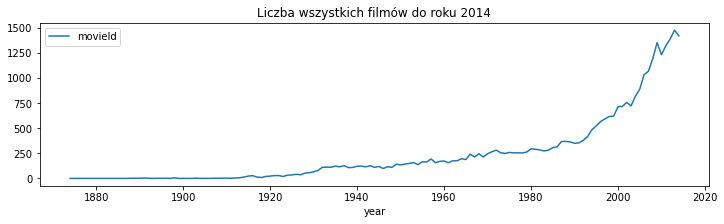

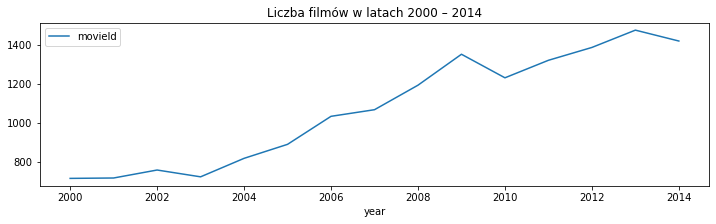

In [18]:
# liczba filmów w poszczególnych latach
# nie do końca zdefiniowany koniec (nie wszystkie dane z ostatniego roku)

df_movies[['movieId', 'year']].groupby('year').count().loc[0:2014].plot(figsize=(12, 3))
plt.title('Liczba wszystkich filmów do roku 2014')
df_movies[['movieId', 'year']].groupby('year').count().loc[2000:2014].plot(figsize=(12, 3))
plt.title('Liczba filmów w latach 2000 – 2014')

#### Cel: badanie związków między latami produkcji, gatunkami filmów, ich oceną

In [19]:
# za pomocą funkcji lambda konwersja do listy każdego rzędu gatunków filmów 

df_movies['genres'].apply(lambda x: list(x))

0        [adventure, animation, children, comedy, fantasy]
1                           [adventure, children, fantasy]
2                                        [comedy, romance]
3                                 [comedy, drama, romance]
4                                                 [comedy]
                               ...                        
34203                                           [thriller]
34204                                                   []
34205                                              [drama]
34206                                      [drama, sci-fi]
34207                                                   []
Name: genres, Length: 34208, dtype: object

In [20]:
# dzięki explode na kolumnie genres gatunki ułożą się jeden pod drugim

df_movies['genres'] = df_movies['genres'].apply(lambda x: list(x))
df1 = df_movies.explode('genres')
df1

,movieId,title,genres,year
0,1,Toy Story,adventure,1995
0,1,Toy Story,animation,1995
0,1,Toy Story,children,1995
0,1,Toy Story,comedy,1995
0,1,Toy Story,fantasy,1995
...,...,...,...,...
34204,151701,Bloodmoney,,2010
34205,151703,The Butterfly Circus,drama,2009
34206,151709,Zero,drama,2015
34206,151709,Zero,sci-fi,2015


In [21]:
# ilość gatunków filmów w każdym zbiorze

df1['genres'].value_counts()

drama          15774
comedy         10124
thriller        5300
romance         4875
action          4445
crime           3446
horror          3365
documentary     3040
adventure       2763
sci-fi          2156
mystery         1837
fantasy         1692
children        1609
animation       1387
war             1345
                1145
musical         1052
western          779
film-noir        338
imax             196
Name: genres, dtype: int64

Text(0.5, 1.0, 'Ilość filmów w gatunkach')

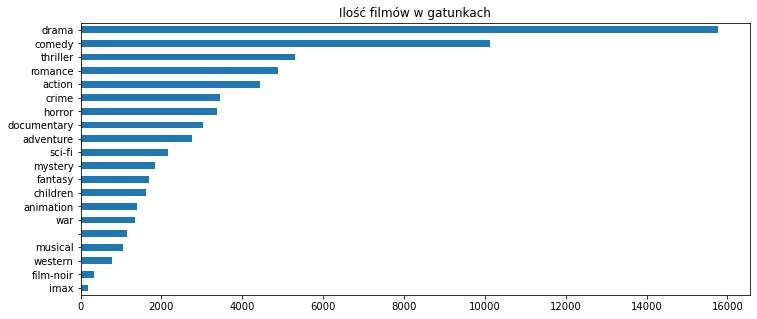

In [22]:
# wykres horyzontalny (kind='barth') od wartości najmniejszej

df1['genres'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(12, 5))
plt.title('Ilość filmów w gatunkach')

In [23]:
# często filmy są przydzielone do wielu kategorii
# dzięki 'value_counts' ilość tych wystąpień

df_movies['genres'].apply(len).value_counts()

1     14372
2     10719
3      6432
4      2023
5       537
6        98
7        21
8         5
10        1
Name: genres, dtype: int64

Text(0.5, 1.0, 'Liczba gatunków przydzielonych filmom')

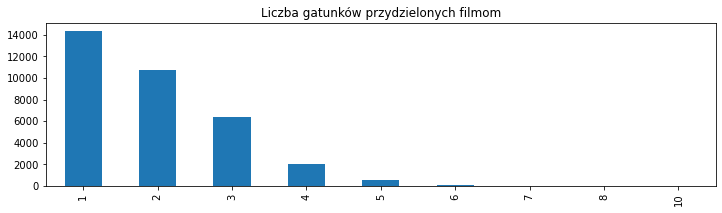

In [24]:
# wykres słupkowy (kind='bar')

df_movies['genres'].apply(len).value_counts().plot(kind='bar', figsize=(12, 3))
plt.title('Liczba gatunków przydzielonych filmom')

In [25]:
# filmy po 1940 roku

df2 = df1[df1['year'] > 1940]
df2

,movieId,title,genres,year
0,1,Toy Story,adventure,1995
0,1,Toy Story,animation,1995
0,1,Toy Story,children,1995
0,1,Toy Story,comedy,1995
0,1,Toy Story,fantasy,1995
...,...,...,...,...
34204,151701,Bloodmoney,,2010
34205,151703,The Butterfly Circus,drama,2009
34206,151709,Zero,drama,2015
34206,151709,Zero,sci-fi,2015


In [26]:
# tworzenie podgrup dla filmów w poszczególnych dekadach

# dla grupowania filmów po przedziałach w poszczególnych latach funkcja 'cut'
# 'bins' to kieszenie,'range' to zakres
# przedział dla lat 1940-2020 co 10 lat

pd.cut(df2['year'], bins=range(1940, 2030, 10), labels=[f"{x}s" \
    for x in range(40, 100, 10)] + ['2000s', '2010s'])

0          90s
0          90s
0          90s
0          90s
0          90s
         ...  
34204    2000s
34205    2000s
34206    2010s
34206    2010s
34207      70s
Name: year, Length: 63231, dtype: category
Categories (8, object): ['40s' < '50s' < '60s' < '70s' < '80s' < '90s' < '2000s' < '2010s']

In [27]:
# liczba filmów w czasach, dekadach

df2['times'] = pd.cut(df2['year'], bins=range(1940, 2030, 10), \
    labels=[f"{x}s" for x in range(40, 100, 10)] + ['2000s', '2010s'])
df2

<ipython-input-27-8b65ba67fd43>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['times'] = pd.cut(df2['year'], bins=range(1940, 2030, 10), \


,movieId,title,genres,year,times
0,1,Toy Story,adventure,1995,90s
0,1,Toy Story,animation,1995,90s
0,1,Toy Story,children,1995,90s
0,1,Toy Story,comedy,1995,90s
0,1,Toy Story,fantasy,1995,90s
...,...,...,...,...,...
34204,151701,Bloodmoney,,2010,2000s
34205,151703,The Butterfly Circus,drama,2009,2000s
34206,151709,Zero,drama,2015,2010s
34206,151709,Zero,sci-fi,2015,2010s


In [28]:
# jak zmieniała się (wzrastała) liczba filmów w poszczególnych gatunkach

df2[['movieId', 'genres', 'times']]

,movieId,genres,times
0,1,adventure,90s
0,1,animation,90s
0,1,children,90s
0,1,comedy,90s
0,1,fantasy,90s
...,...,...,...
34204,151701,,2000s
34205,151703,drama,2000s
34206,151709,drama,2010s
34206,151709,sci-fi,2010s


In [29]:
# grupowanie po parach gatunek-czas zliczając 'movieId'

# zmiana nazwy 'movieId' na 'decades'
# gdy gdzieś none to zastępujemy 0, zmieniamy typ na int
# unstack pozwala rozerwać długi DataFrame i pogrupować indeksy jeden obok drugiego
# jednym indeksem jest 'genres' filmu, a drugim 'decades'

df3 = df2[['movieId', 'genres', 'times']] \
    .groupby(by=['genres', 'times']) \
    .count() \
    .rename(columns={'movieId': 'decades'}) \
    .fillna(0) \
    .astype(int) \
    .unstack()
df3

decades                                         
times           40s  50s   60s   70s   80s   90s 2000s 2010s
genres                                                      
                 27   45    68   128   106   168   206   293
action           76  100   231   446   531   754  1360   857
adventure        84  166   215   215   332   398   743   458
animation        27   19    45    66   144   221   497   329
children         37   36    78   111   172   344   500   298
comedy          307  339   582   667  1097  1806  2975  1757
crime           176  189   195   348   290   531  1011   520
documentary      27   22    75   126   120   328  1250  1040
drama           650  862  1008  1141  1297  2498  4699  2695
fantasy          47   47    95   105   215   269   555   288
film-noir       168   86     6     6    17    14    18     7
horror           52  117   188   371   448   388  1040   673
imax              0    0     0     0     2    21    70   103
musical         111  115    89    93    93   108   236    79
mystery         132   62   102   191   128   223   584   291
romance         301  296   231   208   378   834  1448   670
sci-fi           14  128   145   177   312   340   560   430
thriller        154  145   197   416   436   849  1847  1158
war             133  156   163   102   120   125   321   130
western          79  160   151   112    35    54    66    38

Text(0.5, 1.0, 'Popularność gatunków w czasie')

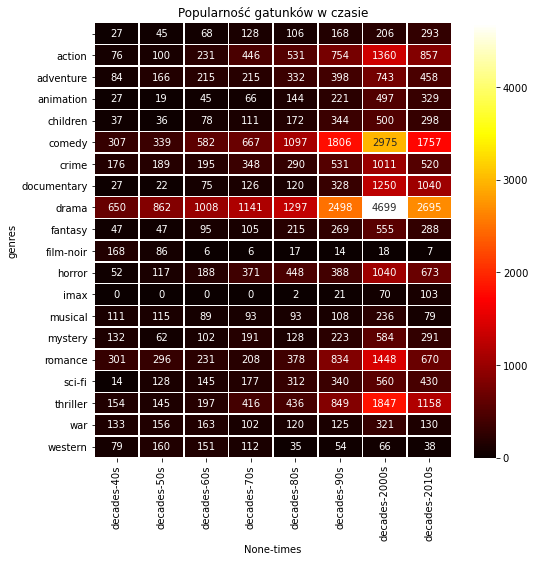

In [30]:
# rozwój gatunków na przestrzeni czasu

# heatmap dla pokazania trendów produkcji w poszczególnych latach
# płótno wykresu przez 'subplots', mapa kolorów przez 'cmap'
# 'annot=True' dla wyświetleń liczbowych, 'fmt' dla usunięcia ułamków
# 'linewidth' dla rozdzielenia linii

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df3, cmap='hot', annot=True, fmt='1', linewidth=0.5)
plt.title('Popularność gatunków w czasie')

#### Cel: badanie ocen poszczególnych filmów
Potem wnioski z korelacji (zależności) między filmami, a ich ocenami

In [31]:
df_ratings.head()

,movieId,rating,timestamp
0,169,2.5,2008-03-07 22:08:14
1,2471,3.0,2008-03-07 22:03:58
2,48516,5.0,2008-03-07 22:03:55
3,2571,3.5,2015-07-06 06:50:33
4,109487,4.0,2015-07-06 06:51:36


In [32]:
# cel: badanie związków między latami produkcji, gatunkami filmów, ich oceną

df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009999 entries, 0 to 1009998
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   movieId    1009999 non-null  int64         
 1   rating     1009999 non-null  float64       
 2   timestamp  1009999 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 23.1 MB


In [33]:
# widzowie oceniali dodając ilość punktów, gwiazdek
# oceny między 0.5 oraz 5.0

df_ratings['rating'].min()

0.5

In [34]:
df_ratings['rating'].max()

5.0

Text(0.5, 1.0, 'Liczba ocen filmów')

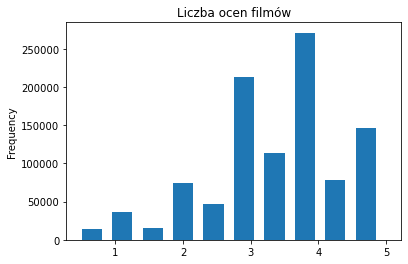

In [35]:
# rozkład nie jest równomierny, a średnia między 3 i 4

df_ratings['rating'].plot(kind='hist', bins=10, width=0.3)
plt.title('Liczba ocen filmów')

In [36]:
# ilość wystąpień ocen

df_ratings['rating'].value_counts()

4.0    271120
3.0    212607
5.0    147001
3.5    113442
4.5     77839
2.0     74139
2.5     47461
1.0     36688
1.5     15259
0.5     14443
Name: rating, dtype: int64

In [37]:
# łączymy obie tabele ('movies','ratings') po 'movieId'

# w tabeli 'ratings' liczymy średnią, odchylenie standardowe,  liczbę ocen
# wybieramy tylko filmy z ponad 100 głosami widzów
# 'dfq' zawiera oceny

dfq = df_ratings[['movieId', 'rating']] \
    .groupby('movieId') \
    .agg({'rating': ['mean', 'std', 'count']})
dfq = dfq[dfq['rating']['count'] > 100]
dfq

rating                
             mean       std count
movieId                          
1        3.875427  0.941717  2633
2        3.238537  0.965685  1025
3        3.211712  1.010954   666
4        2.819672  1.066131   122
5        3.088527  0.986589   706
...           ...       ...   ...
122882   3.932735  1.031030   223
122886   3.950980  0.866053   102
122892   3.666667  1.021163   114
134130   3.976974  0.830580   152
134853   3.900943  1.079582   212

[2081 rows x 3 columns]

In [38]:
# po przycięciu tabeli względem ilości widzów dalsze uproszczenie

# uproszczenie przez wybór tabeli z wartością średnią i odchyleniem standardowym
# funkcja 'concat' łączy obiekty pandy wzdłuż określonej osi

dfq = pd.concat([dfq['rating']['mean'], dfq['rating']['std']], axis=1).reset_index()
dfq

,movieId,mean,std
0,1,3.875427,0.941717
1,2,3.238537,0.965685
2,3,3.211712,1.010954
3,4,2.819672,1.066131
4,5,3.088527,0.986589
...,...,...,...
2076,122882,3.932735,1.031030
2077,122886,3.950980,0.866053
2078,122892,3.666667,1.021163
2079,134130,3.976974,0.830580


Text(0.5, 1.0, 'Rozkład średniej ocen filmów')

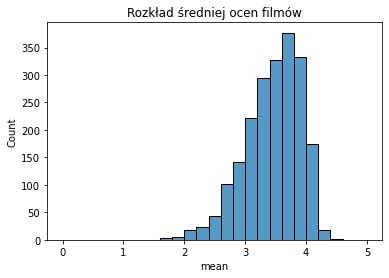

In [39]:
# histogram histplot z biblioteki seaborn
# rozkład (przegląd) średnich ocen dla wszystkich filmów

sns.histplot(dfq['mean'], bins=np.linspace(0, 5, num=26))
plt.title('Rozkład średniej ocen filmów')

In [40]:
# najgorsze filmy z lewej strony wykresu

# dla nich wartości mniejsze niż w skrajnym kwantylu (pół procent)
# ze związku między mean i std widać, że oceny skrajnie negatywne

bad_movies = dfq[dfq['mean'] < dfq['mean'].quantile(0.005)]
bad_movies.head()

,movieId,mean,std
218,393,1.834906,0.994561
642,1381,1.892405,1.155631
684,1556,1.955882,1.091368
737,1707,1.694915,1.025391
752,1760,1.824324,1.164767


In [41]:
# dla najlepszych filmów analogicznie

# zmiana nierówności i skrajmych kwantyli
# najlepsze filmy były z prawej strony wykresu

good_movies = dfq[dfq['mean'] > dfq['mean'].quantile(0.995)]
good_movies.head()

,movieId,mean,std
39,50,4.322271,0.779590
176,318,4.443080,0.734277
275,527,4.301654,0.838246
350,750,4.226719,0.873880
377,858,4.339376,0.867292


In [42]:
# średnia ocen

dfq['mean'].mean()

3.454050593287785

#### Najgorsze filmy

In [43]:
# poniżej lista najgorzej ocenianych filmów

# sortowanie względem średniej i w sposób rosnący
# przez 'merge' dobieramy (scalamy) do 'bad_movies' na indeksie 'movieId'

# najgorszym był "Battlefield Earth"

dfm = df_movies[['movieId', 'title', 'genres', 'year']]

dfm.merge(bad_movies, on='movieId') \
    .sort_values(by='mean', ascending=True) \
    .head()

,movieId,title,genres,year,mean,std
9,3593,Battlefield Earth,"[action, sci-fi]",2000,1.601093,1.046658
3,1707,Home Alone 3,"[children, comedy]",1997,1.694915,1.025391
6,2383,Police Academy 6: City Under Siege,"[comedy, crime]",1989,1.769231,1.148919
4,1760,Spice World,[comedy],1997,1.824324,1.164767
0,393,Street Fighter,"[action, adventure, fantasy]",1994,1.834906,0.994561


#### Najlepsze filmy

In [44]:
# poniżej lista najwyżej ocenianych filmów

# sortowanie względem średniej i w sposób malejący

# najlepszym był "The Shawshank Redemption"

dfm.merge(good_movies, on='movieId') \
    .sort_values(by='mean', ascending=False) \
    .head()

,movieId,title,genres,year,mean,std
1,318,"Shawshank Redemption, The","[crime, drama]",1994,4.443080,0.734277
4,858,"Godfather, The","[crime, drama]",1972,4.339376,0.867292
0,50,"Usual Suspects, The","[crime, mystery, thriller]",1995,4.322271,0.779590
2,527,Schindler's List,"[drama, war]",1993,4.301654,0.838246
6,1178,Paths of Glory,"[drama, war]",1957,4.294286,0.802633


#### Najbardziej popularne filmy


In [45]:
# lista głosów najpopularniejszych filmów

df_ratings[['movieId', 'rating']] \
    .groupby('movieId') \
    .count() \
    .sort_values(by='rating', ascending=False) \
    .rename(columns={'rating': '#votes'}) \
    .head()

,#votes
movieId,
356,3504
296,3394
318,3338
593,3331
480,3010


In [46]:
# za pomocą 'merge' można dodać 'dfm' (plik tytułów filmów)

# najpopularniejszym był "Forrest Gump"

df_ratings[['movieId', 'rating']] \
    .groupby('movieId') \
    .count() \
    .sort_values(by='rating', ascending=False) \
    .rename(columns={'rating': '#votes'}) \
    .merge(dfm, left_index=True, right_on='movieId', how='left') \
    .head()

,#votes,movieId,title,genres,year
352,3504,356,Forrest Gump,"[comedy, drama, romance, war]",1994
293,3394,296,Pulp Fiction,"[comedy, crime, drama, thriller]",1994
315,3338,318,"Shawshank Redemption, The","[crime, drama]",1994
587,3331,593,"Silence of the Lambs, The","[crime, horror, thriller]",1991
476,3010,480,Jurassic Park,"[action, adventure, sci-fi, thriller]",1993


#### Ocena a popularność

In [47]:
# nie były to najwyżej oceniane filmy lecz z największą liczbą głosów
# nie wiemy czy najlepiej oceniane te najbardziej popularne

# do 'dfm' (tytuły) za pomocą 'merge' można też dodać 'dfq' (plik z ocenami)
# sortowanie przez 'std' daje pojęcie o spójności ocen

# czyli jednym się podobało, innym nie, ale ogólnie dobre oceny, popularność

dfc = df_ratings[['movieId', 'rating']] \
    .groupby('movieId') \
    .count() \
    .sort_values(by='rating', ascending=False) \
    .rename(columns={'rating': '#votes'}) \
    .merge(dfm, left_index=True, right_on='movieId', how='left') \
    .merge(dfq, on='movieId', how='inner') \
    .sort_values(by='std', ascending=False)
dfc

,#votes,movieId,title,genres,year,mean,std
2077,101,1924,Plan 9 from Outer Space,"[horror, sci-fi]",1959,2.658416,1.419385
1604,146,2459,"Texas Chainsaw Massacre, The",[horror],1974,2.965753,1.394147
1455,166,63992,Twilight,"[drama, fantasy, romance, thriller]",2008,2.436747,1.363120
1557,152,1483,Crash,"[drama, thriller]",1996,2.904605,1.354088
2045,103,891,Halloween: The Curse of Michael Myers (Hallowe...,"[horror, thriller]",1995,2.616505,1.321400
...,...,...,...,...,...,...,...
1221,208,48738,"Last King of Scotland, The","[drama, thriller]",2006,3.855769,0.643335
2061,102,259,Kiss of Death,"[crime, drama, thriller]",1995,3.014706,0.638903
2058,102,104879,Prisoners,"[drama, mystery, thriller]",2013,3.960784,0.635915
1676,139,81932,"Fighter, The",[drama],2010,3.920863,0.629179


In [48]:
# średnia ocen

dfq['mean'].mean()

3.454050593287785

#### Porównanie 2 najpopularniejszych gatunków

In [49]:
# kopiowanie wartości do nowego DataFrame, aby wartości się nie nadpisywały
# przez apply zmieniamy zbiory na listy
# eksplodowanie tych gatunków, by ustawiły się jako rzędy jeden pod drugim

dfg = dfc[['#votes', 'mean', 'std', 'genres']].copy()
dfg['genres'] = dfg['genres'].apply(lambda x: list(x))
dfg = dfg.explode('genres')
dfg

,#votes,mean,std,genres
2077,101,2.658416,1.419385,horror
2077,101,2.658416,1.419385,sci-fi
1604,146,2.965753,1.394147,horror
1455,166,2.436747,1.363120,drama
1455,166,2.436747,1.363120,fantasy
...,...,...,...,...
2058,102,3.960784,0.635915,mystery
2058,102,3.960784,0.635915,thriller
1676,139,3.920863,0.629179,drama
1834,121,3.871901,0.600447,drama


In [50]:
# porównanie 2 najpopularniejszych gatunków: 'drama', 'comedy'

dfg[dfg['genres'].isin(['drama', 'comedy'])]

,#votes,mean,std,genres
1455,166,2.436747,1.363120,drama
1557,152,2.904605,1.354088,drama
1027,248,2.473790,1.301011,comedy
900,284,3.149648,1.300163,drama
1358,181,3.204420,1.289781,drama
...,...,...,...,...
1221,208,3.855769,0.643335,drama
2061,102,3.014706,0.638903,drama
2058,102,3.960784,0.635915,drama
1676,139,3.920863,0.629179,drama


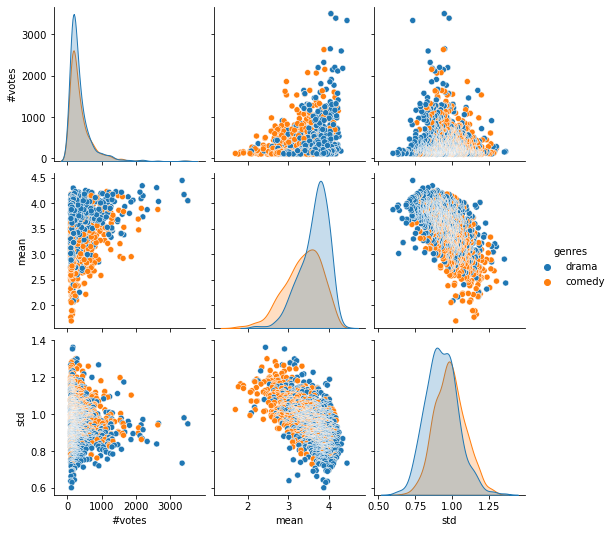

In [51]:
# można pokazać na 'pairplot'
# parametr 'hue' podzeli ten wykres na 2 podwykresy względem gatunku

# komedie i dramaty tak samo popularne
# jednak ocena dramatu statystycznie wyższa niż komedii
# oceniający też bardziej spójni przy dramatach (mniejsze std) niż komediach
# wg widzów lepiej obejrzeć dobry dramat niż średnią komedię

sns.pairplot(dfg[dfg['genres'].isin(['drama', 'comedy'])], hue='genres')

#### Wnioski:
1. czyli niekoniecznie wysoka popularność jest zgodna z oceną
2. widzowie mogą też zwracać uwagę na różne elementy
3. np. widzowie mają ulubione gatunki filmów, a unikają innych

Text(0.5, 1.0, 'Oceny filmów w czasie')

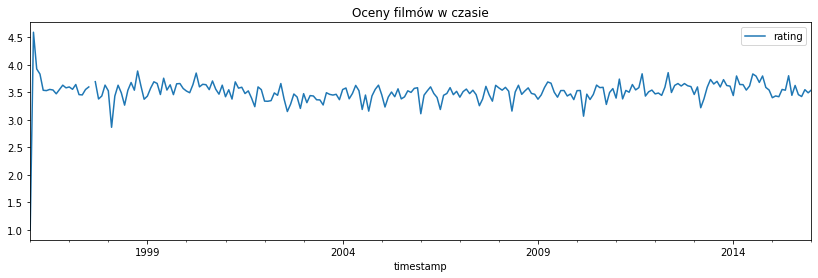

In [52]:
# jak zmieniały się oceny filmów w miesięcznych przedziałach czasu

# rozkład głosów względem czasu za pomocą funkcji mean
# średnia między 3, a 4

df_ratings[['rating', 'timestamp']].resample('M', on='timestamp').mean().plot(figsize=(14, 4))
plt.title('Oceny filmów w czasie')

Text(0.5, 1.0, 'Popularność platformy w czasie')

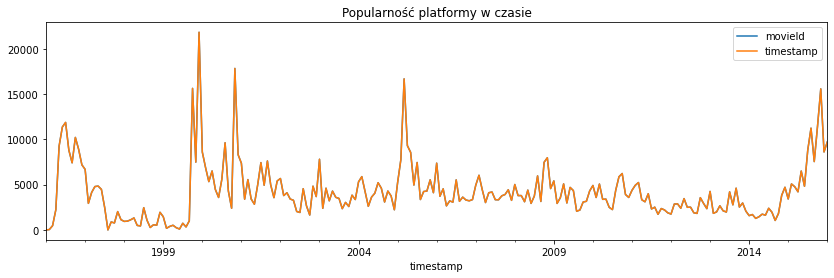

In [53]:
# jak zmieniała się  popularność platformy w przedziałach czasu

# 'count' zlicza głosy w tych przedziałach
# mamy film i czas, w którym była ocena
# funkcja 'resample' działa podobnie jak 'groupby'
# agreguje dane w czasie ('M' to miesiąc, 'timestamp' to funkcja agregowana)

df_ratings[['movieId', 'timestamp']].resample('M', on='timestamp').count().plot(figsize=(14, 4))
plt.title('Popularność platformy w czasie')

#### "Star Wars" – "Gwiezdne Wojny"

In [54]:
# ograniczenie się tylko do serii "Gwiezdne Wojny"

# 'Star Wars: Episode' ogranicza się do 7 filmów
# str.contains() sprawdza czy wyrażenie regularne jest zawarte w ciągu

dfsw = dfm[dfm['title'].str.contains('Star Wars: Episode')].sort_values(by='title')
dfsw

,movieId,title,genres,year
2544,2628,Star Wars: Episode I - The Phantom Menace,"[action, adventure, sci-fi]",1999
5282,5378,Star Wars: Episode II - Attack of the Clones,"[action, adventure, sci-fi, imax]",2002
10123,33493,Star Wars: Episode III - Revenge of the Sith,"[action, adventure, sci-fi]",2005
257,260,Star Wars: Episode IV - A New Hope,"[action, adventure, sci-fi]",1977
1171,1196,Star Wars: Episode V - The Empire Strikes Back,"[action, adventure, sci-fi]",1980
1184,1210,Star Wars: Episode VI - Return of the Jedi,"[action, adventure, sci-fi]",1983
26470,122886,Star Wars: Episode VII - The Force Awakens,"[action, adventure, fantasy, sci-fi]",2015


In [55]:
# przez 'range' (przedział, zakres) numerowanie części 'Star Wars: Episode'
# tworzenie nowej kolumny 'episode' z numerami 7 części filmu
# odrzucenie kolumny 'genres'(gatunki), zmiana kolejności pozostałych 

dfsw = dfm[dfm['title'].str.contains('Star Wars: Episode')].sort_values(by='title')
dfsw['episode'] = range(1, 8)
dfsw[['movieId', 'episode', 'title', 'year']]

,movieId,episode,title,year
2544,2628,1,Star Wars: Episode I - The Phantom Menace,1999
5282,5378,2,Star Wars: Episode II - Attack of the Clones,2002
10123,33493,3,Star Wars: Episode III - Revenge of the Sith,2005
257,260,4,Star Wars: Episode IV - A New Hope,1977
1171,1196,5,Star Wars: Episode V - The Empire Strikes Back,1980
1184,1210,6,Star Wars: Episode VI - Return of the Jedi,1983
26470,122886,7,Star Wars: Episode VII - The Force Awakens,2015


In [56]:
# przez 'merge' łączenie dwóch DataFrame
# dodanie ocen tych filmów łącząc z tabelą 'df' na wspólnym kluczu 'movieId'
# mamy dane wszystkich części 'Star Wars' z ocenami i czasem ich wystawienia

dfsw = dfm[dfm['title'].str.contains('Star Wars: Episode')].sort_values(by='title')
dfsw['episode'] = range(1, 8)
dfsw = dfsw[['movieId', 'episode', 'title', 'year']].merge(df_ratings, on='movieId')
dfsw

,movieId,episode,title,year,rating,timestamp
0,2628,1,Star Wars: Episode I - The Phantom Menace,1999,3.0,2000-11-22 04:34:41
1,2628,1,Star Wars: Episode I - The Phantom Menace,1999,2.0,2005-11-28 03:16:45
2,2628,1,Star Wars: Episode I - The Phantom Menace,1999,5.0,1999-12-12 09:10:34
3,2628,1,Star Wars: Episode I - The Phantom Menace,1999,4.0,2002-05-21 08:26:40
4,2628,1,Star Wars: Episode I - The Phantom Menace,1999,4.0,2000-11-26 21:49:39
...,...,...,...,...,...,...
10608,122886,7,Star Wars: Episode VII - The Force Awakens,2015,4.5,2016-01-05 08:16:27
10609,122886,7,Star Wars: Episode VII - The Force Awakens,2015,4.0,2016-01-03 18:23:09
10610,122886,7,Star Wars: Episode VII - The Force Awakens,2015,5.0,2016-01-25 17:40:31
10611,122886,7,Star Wars: Episode VII - The Force Awakens,2015,2.5,2015-10-25 19:01:58


In [57]:
# stworzenie pustego słownika
# z tabeli będziemy wybierać mniejsze tabele odwołując się do konkretnej części filmu
# z otrzymanej tabeli 3 kolumny ('rating', 'year', 'timestamp')
# na tej tabeli wywołamy funkcję 'resample', gdzie będziemy zliczać średnie w przedziałach rocznych
# 'Y' jako pierwszy argument, 'mean' jako funkcja agregująca
# wynik zapisany do słownika 'sw[i]'

sw = {}
for i in range(1, 8):
    sw[i] = dfsw[dfsw['episode'] == i][['rating', 'year', 'timestamp']] \
        .resample('Y', on='timestamp').mean()

In [58]:
# mamy więc tabelę, w której kluczem będzie 'timestamp'
# następnie będzie 'rating' i rok produkcji 'year'

sw[1]

,rating,year
timestamp,,
1999-12-31,3.297619,1999
2000-12-31,3.440594,1999
2001-12-31,3.322835,1999
2002-12-31,3.156250,1999
2003-12-31,3.054054,1999
2004-12-31,2.916667,1999
2005-12-31,2.885246,1999
2006-12-31,2.812500,1999
2007-12-31,2.824176,1999


In [59]:
# następnie zresetowanie tego indeksu i stworzenie nowej kolumny
# stworzenie kolumny 'year_since' (ile lat upłynęło od ukazania się filmu)
# wybierzemy rok i odejmujemy rok produkcji

sw = {}
for i in range(1, 8):
    sw[i] = dfsw[dfsw['episode'] == i][['rating', 'year', 'timestamp']] \
            .resample('Y', on='timestamp').mean()
    sw[i] = sw[i].reset_index()
    sw[i]['years_since'] = sw[i]['timestamp'].dt.year - sw[i]['year']

In [60]:
sw[1]

,timestamp,rating,year,years_since
0,1999-12-31,3.297619,1999,0
1,2000-12-31,3.440594,1999,1
2,2001-12-31,3.322835,1999,2
3,2002-12-31,3.156250,1999,3
4,2003-12-31,3.054054,1999,4
5,2004-12-31,2.916667,1999,5
6,2005-12-31,2.885246,1999,6
7,2006-12-31,2.812500,1999,7
8,2007-12-31,2.824176,1999,8
9,2008-12-31,3.060811,1999,9


In [61]:
# kolumna 'year' już nieistotna
# indeksem nowej tabeli będzie 'years_since'
# otrzymamy tabelą z indeksem, którym jest ilość lat od produkcji
# drugą kolumną 'rating' (ocena średnia w tym roku)

sw = {}
for i in range(1, 8):
    sw[i] = dfsw[dfsw['episode'] == i][['rating', 'year', 'timestamp']] \
            .resample('Y', on='timestamp').mean()
    sw[i] = sw[i].reset_index()
    sw[i]['years_since'] = sw[i]['timestamp'].dt.year - sw[i]['year']
    sw[i] = sw[i][['rating', 'years_since']].set_index('years_since')

In [62]:
sw[1]

,rating
years_since,
0,3.297619
1,3.440594
2,3.322835
3,3.156250
4,3.054054
5,2.916667
6,2.885246
7,2.812500
8,2.824176


In [63]:
# takie tabele możemy złączyć w jedną używając funkcji 'concat'
# uzyskujemy podobny wynik dla każdej części filmu "Star Wars"
# dla ostatniej kolumny tylko dwie wartości, bo film ukazał się najpóźniej
# część 4,5,6 powstały najwcześniej

pd.concat(sw, axis=1)

,1,2,3,4,5,6,7
,rating,rating,rating,rating,rating,rating,rating
years_since,,,,,,,
0,3.297619,3.448718,3.739496,NaN,NaN,NaN,3.860000
1,3.440594,3.280000,3.561538,NaN,NaN,NaN,4.038462
2,3.322835,3.253521,3.396341,NaN,NaN,NaN,NaN
3,3.156250,3.042857,3.593750,NaN,NaN,NaN,NaN
4,3.054054,3.000000,3.622642,NaN,NaN,NaN,NaN
5,2.916667,3.111111,3.254902,NaN,NaN,NaN,NaN
6,2.885246,3.246269,3.571429,NaN,NaN,NaN,NaN
7,2.812500,3.166667,3.108696,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Oceny poszczególnych części filmu w czasie')

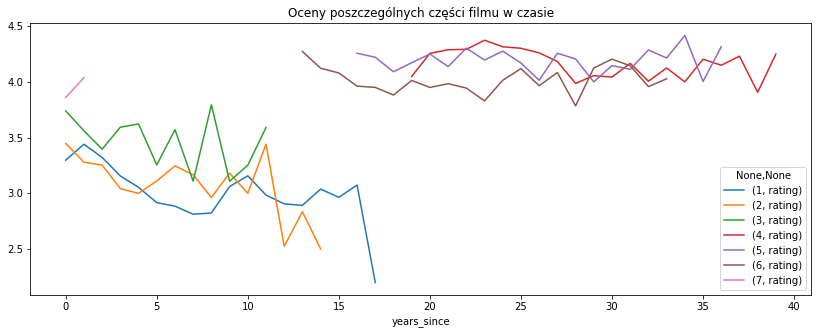

In [64]:
# wyświetlenie wyników przez 'concat' i dodatkowo funkcję 'plot'

# nowsze części filmu oceniane gorzej niż wcześniejsze
# z upływem czasu widać też spadek ocen

# te wcześniejsze części filmu dużo lepiej oceniane
# również dużo bardziej stałe w swojej ocenie
 
pd.concat(sw, axis=1).plot(figsize=(14, 5))
plt.title('Oceny poszczególnych części filmu w czasie')

In [65]:
# części 4,5,6 powstały najwcześniej
# prawdopodobnie starsze wersje wyżej oceniane niż wcześniejsze

dfsw = dfm[dfm['title'].str.contains('Star Wars: Episode')]
dfsw = dfsw[['movieId', 'title', 'year']].merge(df_ratings, on='movieId').sort_values(by='rating', ascending=False)
dfsw.head()

,movieId,title,year,rating,timestamp
10612,122886,Star Wars: Episode VII - The Force Awakens,2015,5.0,2016-01-02 22:49:43
3115,1196,Star Wars: Episode V - The Empire Strikes Back,1980,5.0,1997-11-16 04:18:03
3099,1196,Star Wars: Episode V - The Empire Strikes Back,1980,5.0,2006-01-12 01:46:57
3100,1196,Star Wars: Episode V - The Empire Strikes Back,1980,5.0,2000-12-31 05:58:27
3101,1196,Star Wars: Episode V - The Empire Strikes Back,1980,5.0,2002-04-02 20:27:37


#### Wnioski
1. nowsze części filmu oceniane gorzej niż wcześniejsze
2. te wcześniejsze części filmu dużo lepiej oceniane
3. również dużo bardziej stałe w swojej ocenie


### Zastosowanie regresji wielomianowej

#### 1 przykład – "Star Wars: Episode 1" w interpolacji
Wykorzystanie do znajdowania wartości pośrednich w obecnych czasach bez prognozowania w przyszłości.

In [66]:
# zmiana reprezenacji danych z pandasowego DataFame na tablicę w Numpy
# najpierw 'reset_index' i podajemy przedział indeksów w 'numpy'
# 'x' będzie liczbą lat od produkcji, a 'y' będzie oceną 
# wykorzystując te 'x','y' chcemy zastosować regresję wielomianową

x = sw[1].reset_index().to_numpy()[:, 0]
y = sw[1].reset_index().to_numpy()[:, 1] 
y

array([3.29761905, 3.44059406, 3.32283465, 3.15625   , 3.05405405,
       2.91666667, 2.8852459 , 2.8125    , 2.82417582, 3.06081081,
       3.15740741, 2.98484848, 2.90566038, 2.89285714, 3.03846154,
       2.96428571, 3.07462687, 2.2       ])

In [67]:
# współczynniki wielomianu uzyskujemy przez funkcję 'polyfit'
# robimy to na 'x','y' przekazując 'deg' (stopień wielomianu)
# 't' podnosimy do każdej kolejnej potęgi, stąd 'deg+1'
# będą więc 4 współczynniki zaczynając od 0

# zastosować można poniżej przedstawiony algorytm

from numpy import polyfit

# 'linspace' zwraca liczby w określonym przedziale
# polyfit - dopasowanie wielomianowe metodą najmniejszych kwadratów
# dopasowuje wielomian stopnia 'deg' do (x,y)
# concatenate - łączy sekwencję wzdłuż istniejącej osi
# sprawdzimy optymalny stopień wielomianu (np. 2,3,4)

t = np.linspace(0, 20, num=21)

#deg = 2
deg = 3
#deg = 4

coeffs = polyfit(x, y, deg=deg).reshape(-1, 1)
X = np.concatenate(list(map(lambda i: t.reshape(1, -1) ** i, reversed(range(deg + 1)))))
Y = (coeffs.T @ X).flatten()

Text(0.5, 1.0, 'Przedziały ocen od kilkunastu lat')

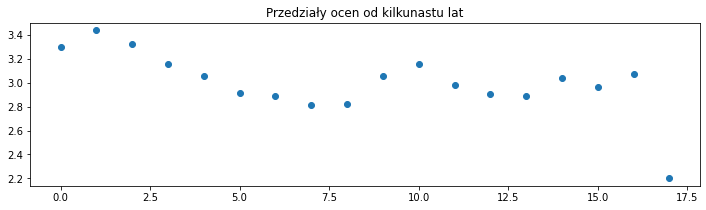

In [68]:
# na wykresie oceny widzów dla 1 części "Star Wars"

# szkielet wykresu przy użyciu funkcji 'subplots'
# wywołamy 'ax.plot', potem sw[1] dla 1 części i oznaczymy dane przez kółko

fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(sw[1], 'o')
plt.title('Przedziały ocen od kilkunastu lat')

Text(0.5, 1.0, 'Przewidywane wyniki między znanymi węzłami danych')

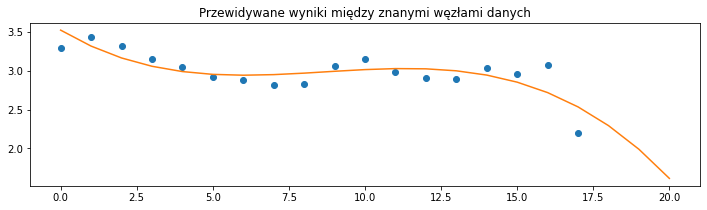

In [69]:
# następnie nasze przewidywania na podstawie regresji wielomianowej

# widzimy, że wielomian 3-go stopnia był dobrym dopasowaniem
# gdy zmienimy na 2-go stopnia, to nie mamy dobrego dopasowania
# dla 4-go stopnia dopasowanie staje się tak dobre, że mało realistyczne
# nie dałoby się przewidzieć co stałoby się z głosami widzów później

fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(sw[1], 'o')
ax.plot(t, Y)
plt.title('Przewidywane wyniki między znanymi węzłami danych')

#### 2 przykład – wszystkie dane w ekstrapolacji
Prognozowanie wartości zmiennej lub funkcji poza zakresem, dla którego mamy dane.

Dopasowanie do istniejących danych pewnej funkcji, następnie wyliczenie jej wartości w szukanym punkcie w przyszłości.

In [70]:
# ilość filmów w poszczególnych latach

dfm[['movieId', 'year']].groupby('year').count()

,movieId
year,
-1,68
1874,1
1878,1
1887,1
1888,2
...,...
2012,1387
2013,1476
2014,1420


Text(0.5, 1.0, 'Ilość filmów w poszczególnych latach')

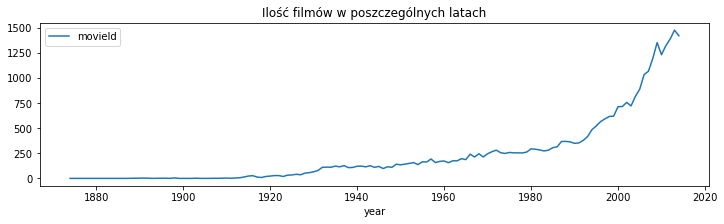

In [71]:
# tendencje w formie wykresu

dfm[['movieId', 'year']].groupby('year').count().loc[0:2014].plot(figsize=(12, 3))
plt.title('Ilość filmów w poszczególnych latach')

In [72]:
# najpierw zamienimy tę tabelę na 'numpy'
# można teraz na tych danych dokonać regresji wielomianowej
# naszymi 'x' będzie rok produkcji, 'y' liczba filmów w konkretnych latach

X = dfm[['movieId', 'year']].groupby('year').count().loc[0:].reset_index().to_numpy()

In [73]:
X

array([[1874,    1],
       [1878,    1],
       [1887,    1],
       [1888,    2],
       [1890,    3],
       [1891,    4],
       [1892,    3],
       [1893,    1],
       [1894,    2],
       [1895,    2],
       [1896,    3],
       [1897,    1],
       [1898,    6],
       [1899,    1],
       [1900,    1],
       [1901,    1],
       [1902,    1],
       [1903,    3],
       [1904,    1],
       [1905,    1],
       [1908,    2],
       [1909,    3],
       [1910,    4],
       [1911,    2],
       [1912,    5],
       [1913,    7],
       [1914,   15],
       [1915,   24],
       [1916,   28],
       [1917,   14],
       [1918,   10],
       [1919,   20],
       [1920,   24],
       [1921,   29],
       [1922,   29],
       [1923,   20],
       [1924,   33],
       [1925,   35],
       [1926,   42],
       [1927,   37],
       [1928,   53],
       [1929,   58],
       [1930,   66],
       [1931,   80],
       [1932,  111],
       [1933,  113],
       [1934,  112],
       [1935,

In [74]:
# 'X' to ilość filmów do roku 2014
# dane ograniczone do roku 2014, by uniknąć wyników niewiarygodnych

X = dfm[['movieId', 'year']].groupby('year').count().loc[0:2014].reset_index().to_numpy()

##### Co stanie się z filmami po 2030 roku?
W ekstrapolacji stosujemy algorytm podobny do interpolacji w „Star Wars: Episode 1”.
Zmiana odpowiednich parametrów, wartości zmiennych.

Na wykresach przewidywane wyniki (linia) między znanymi węzłami danych (kropki).
Sprawdzę kolejno, czy optymalny wielomian będzie stopnia 2,3,4.

In [75]:
# 't' będzie znowu zmienną, dzięki której będziemy przewidywać
# np. co stanie się z filmami w 2030 r.
# kopiujemy kod, który już mamy (z 1 przykładu)
# zamieniamy tylko 'x','y' na 'X'
# zerowy indeks to rok produkcji, a pierwszy indeks to ilość filmów
# 'Y' to ilość filmów wyświetlanych w konkretnych latach

# następnie sprawdźmy kolejno, czy optymalny wielomian będzie stopnia 2,3,4

deg = 2

X = dfm[['movieId', 'year']].groupby('year').count().loc[0:2014].reset_index().to_numpy()

t = np.linspace(1900, 2030, num=41)

coeffs = polyfit(X[:, 0], X[:, 1], deg=deg).reshape(-1, 1)
X = np.concatenate(list(map(lambda i: t.reshape(1, -1) ** i, reversed(range(deg + 1)))))
Y = (coeffs.T @ X).flatten()

Text(0.5, 1.0, 'Przewidywana ilość filmów do roku 2030          (wielomian 2 stopnia)')

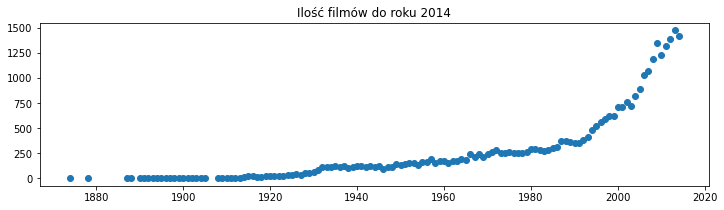

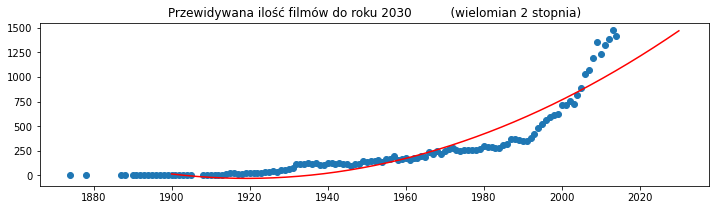

In [76]:
# dla wielomianu 2-go stopnia nie mamy dobrego dopasowania (zbyt odstający)

fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(dfm[['movieId', 'year']].groupby('year').count().loc[0:2014], 'o')
plt.title('Ilość filmów do roku 2014')

# dodajemy nasz wielomian (czyli 't' oraz 'Y')
# tworzymy wykres oryginalnych danych (kropki)
# przewidywania czerwoną linią

fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(dfm[['movieId', 'year']].groupby('year').count().loc[0:2014], 'o')
ax.plot(t, Y, 'r')
plt.title('Przewidywana ilość filmów do roku 2030          (wielomian 2 stopnia)')

Text(0.5, 1.0, 'Przewidywana ilość filmów do roku 2030          (wielomian 3 stopnia)')

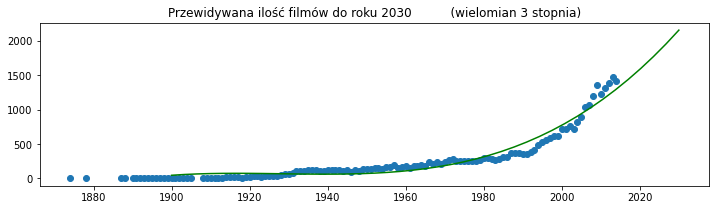

In [77]:
# wielomian 3-go stopnia wydaje się dobry

# mógłby symulować, w jaki sposób ilość fimów wzrastałaby w przyszłości

deg = 3

X = dfm[['movieId', 'year']].groupby('year').count().loc[0:2014].reset_index().to_numpy()

coeffs = polyfit(X[:, 0], X[:, 1], deg=deg).reshape(-1, 1)
X = np.concatenate(list(map(lambda i: t.reshape(1, -1) ** i, reversed(range(deg + 1)))))
Y = (coeffs.T @ X).flatten()

# dodajemy nasz wielomian (czyli 't' oraz 'Y')
# przewidywania zaznaczone zieloną linią

fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(dfm[['movieId', 'year']].groupby('year').count().loc[0:2014], 'o')
ax.plot(t, Y, 'g')
#ax.plot(t, Y, 'r')
plt.title('Przewidywana ilość filmów do roku 2030          (wielomian 3 stopnia)')

Text(0.5, 1.0, 'Przewidywana ilość filmów do roku 2030          (wielomian 4 stopnia)')

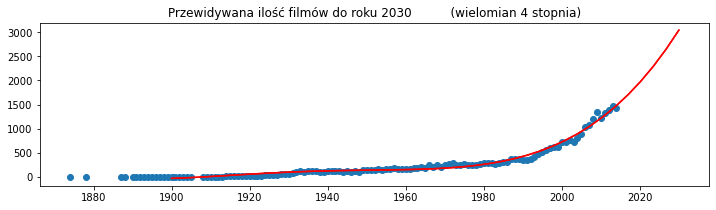

In [78]:
# dla 4-go stopnia dopasowanie staje się tak dobre, że mało realistyczne (model nie uczy się)

# przy stopniu wyższym od 3 nie dałoby się przewidzieć co stałoby się z głosami widzów później
# sprawdzałem też dla wyższych niż pokazany niżej na wykresie 4-go stopnia

deg = 4

X = dfm[['movieId', 'year']].groupby('year').count().loc[0:2014].reset_index().to_numpy()

coeffs = polyfit(X[:, 0], X[:, 1], deg=deg).reshape(-1, 1)
X = np.concatenate(list(map(lambda i: t.reshape(1, -1) ** i, reversed(range(deg + 1)))))
Y = (coeffs.T @ X).flatten()

# dodajemy nasz wielomian (czyli 't' oraz 'Y')
# przewidywania zaznaczone czerwoną linią

fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(dfm[['movieId', 'year']].groupby('year').count().loc[0:2014], 'o')
ax.plot(t, Y, 'r')
ax.plot(t, Y, 'r')
plt.title('Przewidywana ilość filmów do roku 2030          (wielomian 4 stopnia)')

#### Porównanie wyników na podstawie regresji wielomianowej

1. Widzimy, że wielomian 3-go stopnia był dobrym dopasowaniem.

2. Gdy zmienimy na 2-go stopnia, to nie mamy dobrego dopasowania (zbyt odstający).

3. Dla 4-go stopnia (i wyższych) dopasowanie staje się tak dobre, że mało realistyczne.

4. Przy stopniu wyższym od 3 nie dałoby się przewidzieć co stałoby się z głosami widzów później.

#### Mieliśmy 2 przykłady wykorzystania regresji wielomianowej
Pierwszy - w <u>interpolacji</u>, drugi - w <u>ekstrapolacji</u>.
1. Pierwszy - przy "Star Wars" oceny można było wykorzystać do znajdowania wartości pośrednich w obecnych czasach (interpolacja).
2. Drugi - przy ilości wszystkich produkowanych filmów, do przewidywania szybkości wzrostu lub spadku w przyszłości (ekstrapolacja).